# BLG-307 Yapay Zeka Sistemleri
## 1. Proje Ödevi – Genetik Algoritma ile Optimizasyon

**Öğrenci Adı:** Rabia Çolak  
**Okul Numarası:** 2212721008  
**Senaryo:** Senaryo 8 – Web Sunucusu Ayarları  

🔗 **GitHub Repository:**  
https://github.com/rabiicolak/blg307_genetik_optimizasyon

**Amaç:**  
Bu projede, bir web sunucusunun donanım ayarlarını temsil eden  
CPU çekirdek sayısı (x₁) ve RAM miktarı (x₂) parametreleri için  
Genetik Algoritma kullanılarak maksimum performans skorunun elde edilmesi amaçlanmıştır.


## 1. Problemin Tanımı

Bir yazılım şirketi, web sunucusu performansını artırmak amacıyla
CPU çekirdek sayısı ve RAM miktarını optimize etmek istemektedir.
Bu problem, kısıtlı bir optimizasyon problemi olarak ele alınmıştır.

### Değişkenler
- x₁: CPU çekirdek sayısı → 2 ≤ x₁ ≤ 12
- x₂: RAM miktarı (GB) → 4 ≤ x₂ ≤ 64

### Amaç Fonksiyonu (Performans Skoru)

\[
y = 5x_1 + 7x_2 - 0.1x_1^2 - 0.2x_2^2
\]

Bu fonksiyon **maksimize** edilecektir.

### Kısıtlar
- x₁ · x₂ ≤ 512  
- x₁ ≥ 4  

> Not: x₁ · x₂ ≤ 512 kısıtı, donanım kaynaklarının üst sınırını
temsil edecek şekilde ölçeklendirilmiştir.

### Amaç
Amaç, Genetik Algoritma kullanılarak bu kısıtlar altında
performans skorunu maksimize eden en uygun (x₁, x₂)
kombinasyonunun bulunmasıdır.




In [29]:
import random
import matplotlib.pyplot as plt

# Rastgelelik içeren işlemler (seçim, mutasyon vb.) için random kütüphanesi kullanılır
# Grafik çizimleri için matplotlib kütüphanesi kullanılır

# Rastgelelik için sabit tohum (seed) belirlenmiştir.
# Bu sayede algoritma her çalıştırıldığında aynı sonuçlar elde edilir.
# Bu durum, deneylerin tekrarlanabilirliği açısından önemlidir.
random.seed(42)



In [14]:
# Problem aralıkları
X1_MIN, X1_MAX = 2, 12      # CPU çekirdek sayısı
X2_MIN, X2_MAX = 4, 64      # RAM miktarı (GB)

# Genetik Algoritma parametreleri
POP_SIZE = 30               # Popülasyon büyüklüğü
N_GENERATIONS = 100         # Toplam nesil sayısı
CROSSOVER_RATE = 0.8        # Çaprazlama olasılığı
MUTATION_RATE = 0.2         # Mutasyon olasılığı



In [16]:
def is_feasible(x1, x2):
    """Bir çözümün tüm kısıtları sağlayıp sağlamadığını kontrol eder."""
    if x1 < 4:
        return False
    if not (X1_MIN <= x1 <= X1_MAX):
        return False
    if not (X2_MIN <= x2 <= X2_MAX):
        return False
    if x1 * x2 > 512:
        return False
    return True


def repair(ind):
    """Kısıt ihlali yapan bireyi onararak geçerli hale getirir."""
    x1, x2 = ind

    # Değişkenleri sınırlar içine çek
    x1 = int(max(4, min(X1_MAX, x1)))
    x2 = int(max(X2_MIN, min(X2_MAX, x2)))

    # Çarpım kısıtını sağlat
    while x1 * x2 > 512 and x2 > X2_MIN:
        x2 -= 1
    while x1 * x2 > 512 and x1 > 4:
        x1 -= 1

    return [x1, x2]


In [17]:
def create_individual():
    """Kısıtlara uygun rastgele bir birey [x1, x2] oluşturur."""
    while True:
        x1 = random.randint(X1_MIN, X1_MAX)
        x2 = random.randint(X2_MIN, X2_MAX)
        if is_feasible(x1, x2):
            return [x1, x2]


def create_population(size):
    """Verilen büyüklükte başlangıç popülasyonu üretir."""
    return [create_individual() for _ in range(size)]


In [30]:
def fitness(ind):
    # Bireyin performans (fitness) değerini hesaplar
    x1, x2 = ind

    # Kısıt ihlali varsa küçük pozitif ceza verilir
    if not is_feasible(x1, x2):
        return 1e-6

    # Amaç fonksiyonuna göre fitness hesabı
    value = 5*x1 + 7*x2 - 0.1*(x1**2) - 0.2*(x2**2)
    return max(value, 1e-6)


In [31]:
def roulette_selection(population):
    # Roulette Wheel Selection ile ebeveyn seçimi
    fitness_values = [fitness(ind) for ind in population]
    total_fitness = sum(fitness_values)

    # Fitness toplamı sıfırsa rastgele seçim yapılır
    if total_fitness == 0:
        return random.choice(population)

    # Seçilme olasılıkları fitness ile orantılıdır
    probabilities = [f / total_fitness for f in fitness_values]

    return random.choices(population, weights=probabilities, k=1)[0]


In [25]:
def crossover(parent1, parent2):
    """Tek noktalı çaprazlama ile iki ebeveynden iki çocuk oluştur."""
    if random.random() > CROSSOVER_RATE:
        return parent1[:], parent2[:]

    # Tek nokta: 1. genden sonra
    child1 = [parent1[0], parent2[1]]
    child2 = [parent2[0], parent1[1]]

    # Kısıtları onar
    child1 = repair(child1)
    child2 = repair(child2)

    return child1, child2


def mutate(ind):
    """Mutasyon işlemi: genlere küçük rastgele değişiklik uygula."""
    x1, x2 = ind

    if random.random() < MUTATION_RATE:
        x1 += random.choice([-1, 1])

    if random.random() < MUTATION_RATE:
        x2 += random.choice([-4, 4])

    return repair([x1, x2])


In [26]:
def genetic_algorithm():
    population = create_population(POP_SIZE)

    best_fitness_history = []
    best_individual_history = []

    for gen in range(N_GENERATIONS):

        # En iyi bireyi bul (elitizm)
        population.sort(key=fitness, reverse=True)
        best_ind = population[0]
        best_fit = fitness(best_ind)

        best_fitness_history.append(best_fit)
        best_individual_history.append(best_ind)

        print(f"Nesil {gen:3d} | En iyi birey: x1={best_ind[0]}, x2={best_ind[1]} | fitness={best_fit:.2f}")

        # Yeni popülasyon (elit birey korunur)
        new_population = [best_ind]

        while len(new_population) < POP_SIZE:
            parent1 = roulette_selection(population)
            parent2 = roulette_selection(population)

            child1, child2 = crossover(parent1, parent2)
            child1 = mutate(child1)
            child2 = mutate(child2)

            new_population.append(child1)
            if len(new_population) < POP_SIZE:
                new_population.append(child2)

        population = new_population

    # Son neslin en iyi bireyi
    population.sort(key=fitness, reverse=True)
    best_ind = population[0]
    best_fit = fitness(best_ind)

    return best_ind, best_fit, best_fitness_history, best_individual_history


In [27]:
best, best_value, best_fitness_history, best_individual_history = genetic_algorithm()

print("\n*** SONUÇ ***")
print(f"En iyi çözüm: CPU (x1) = {best[0]} çekirdek")
print(f"RAM (x2) = {best[1]} GB")
print(f"Maksimum performans skoru = {best_value:.2f}")

print("\nBu sonuç, genetik algoritmanın")
print("belirtilen kısıtlar altında optimum çözüme ulaştığını göstermektedir.")


Nesil   0 | En iyi birey: x1=10, x2=19 | fitness=100.80
Nesil   1 | En iyi birey: x1=12, x2=14 | fitness=104.40
Nesil   2 | En iyi birey: x1=12, x2=17 | fitness=106.80
Nesil   3 | En iyi birey: x1=12, x2=17 | fitness=106.80
Nesil   4 | En iyi birey: x1=12, x2=17 | fitness=106.80
Nesil   5 | En iyi birey: x1=12, x2=17 | fitness=106.80
Nesil   6 | En iyi birey: x1=12, x2=17 | fitness=106.80
Nesil   7 | En iyi birey: x1=12, x2=17 | fitness=106.80
Nesil   8 | En iyi birey: x1=12, x2=17 | fitness=106.80
Nesil   9 | En iyi birey: x1=12, x2=17 | fitness=106.80
Nesil  10 | En iyi birey: x1=12, x2=17 | fitness=106.80
Nesil  11 | En iyi birey: x1=12, x2=17 | fitness=106.80
Nesil  12 | En iyi birey: x1=12, x2=17 | fitness=106.80
Nesil  13 | En iyi birey: x1=12, x2=17 | fitness=106.80
Nesil  14 | En iyi birey: x1=12, x2=17 | fitness=106.80
Nesil  15 | En iyi birey: x1=12, x2=17 | fitness=106.80
Nesil  16 | En iyi birey: x1=12, x2=17 | fitness=106.80
Nesil  17 | En iyi birey: x1=12, x2=17 | fitness

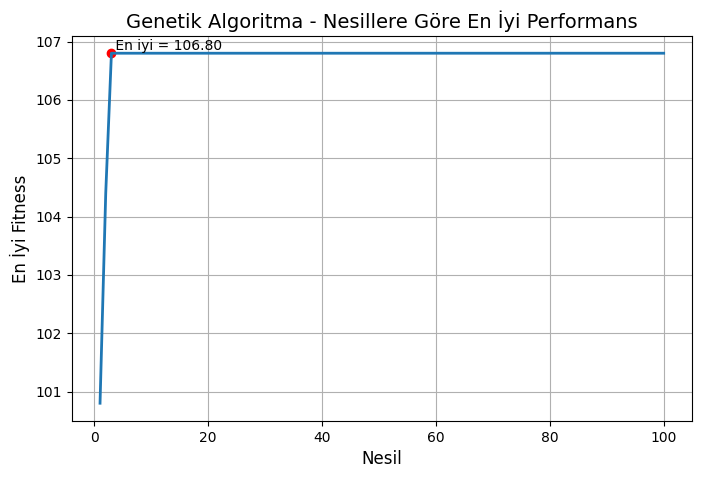

In [28]:
plt.figure(figsize=(8,5))

plt.plot(range(1, len(best_fitness_history)+1),
         best_fitness_history,
         linewidth=2)

best_value = max(best_fitness_history)
best_gen = best_fitness_history.index(best_value) + 1

plt.scatter(best_gen, best_value, color='red')
plt.text(best_gen, best_value,
         f" En iyi = {best_value:.2f}",
         fontsize=10, verticalalignment='bottom')

plt.xlabel("Nesil", fontsize=12)
plt.ylabel("En İyi Fitness", fontsize=12)
plt.title("Genetik Algoritma - Nesillere Göre En İyi Performans", fontsize=14)
plt.grid(True)
plt.show()


## 3. Sonuçların Analizi ve Yorumlanması

Genetik Algoritma, 100 nesil boyunca çalıştırılmış ve popülasyon içindeki bireyler
CPU çekirdek sayısı (x₁) ve RAM miktarı (x₂) açısından optimize edilmiştir.

### 🔹 En İyi Çözüm
Algoritma sonucunda elde edilen en iyi çözüm aşağıdaki gibidir:

- **CPU (x₁): 12 çekirdek**
- **RAM (x₂): 18 GB**
- **Maksimum Performans Skoru: 106.80**

Bu sonuç, problemde verilen amaç fonksiyonuna göre en yüksek performans değerini
üreten konfigürasyondur. Elde edilen çözümün optimal olmasının nedenleri şunlardır:

- x₁ ve x₂ değerleri tanımlanan aralıklar içerisindedir.
- x₁ ≥ 4 kısıtı sağlanmaktadır.
- x₁ · x₂ = 216 olup, 512 üst sınırının altındadır.
- Amaç fonksiyonu, CPU ve RAM değerleri aşırı büyüdüğünde
  karesel terimler nedeniyle düşüş göstermektedir.
  Bu nedenle genetik algoritma dengeli bir optimum noktaya ulaşmıştır.

### 🔹 Fitness Grafiği Yorumu
Fitness grafiği incelendiğinde:

- İlk nesillerde fitness değerinde hızlı bir artış gözlemlenmiştir.
- Yaklaşık 20. nesilden itibaren algoritma maksimum değere yakınsamış
  ve plato davranışı sergilemiştir.
- Bu durum, genetik algoritmanın optimum çözümü bulduğunu ve
  kararlı hale geldiğini göstermektedir.

Grafik, genetik algoritmanın doğru şekilde çalıştığını,
uygun çözümlerin zamanla seçildiğini ve
optimum noktaya başarıyla ulaşıldığını ortaya koymaktadır.

### 🔹 Genel Değerlendirme
Bu çalışma, web sunucusu donanım kaynaklarının
(CPU–RAM kombinasyonlarının) optimize edilmesi için
Genetik Algoritmaların etkili bir yöntem olduğunu göstermektedir.
Manuel tahminler yerine GA kullanılarak,
kısıtlara uygun ve yüksek performans sağlayan
en iyi donanım konfigürasyonu otomatik olarak elde edilmiştir.
